In [1]:
import torch
import numpy as np

In [5]:
t_1 = torch.ones(2, 3)
t_2 = torch.full((4, 3), 2)
print('t_1:{}\n size of t_1:{}'.format(t_1, t_1.size()))
print('t_2:{}\n size of t_2:{}'.format(t_2, t_2.size()))
t_cat = torch.cat([t_1, t_2], dim=0)
print('t_cat:{}\n size of t_cat:{}'.format(t_cat, t_cat.size()))

t_1:tensor([[1., 1., 1.],
        [1., 1., 1.]])
 size of t_1:torch.Size([2, 3])
t_2:tensor([[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]])
 size of t_2:torch.Size([4, 3])
t_cat:tensor([[1., 1., 1.],
        [1., 1., 1.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])
 size of t_cat:torch.Size([6, 3])


In [6]:
t_1 = torch.full((3, 2), 3)
t_2 = torch.full((3, 4), 4)
print('t_1:{}\n size of t_1:{}'.format(t_1, t_1.size()))
print('t_2:{}\n size of t_2:{}'.format(t_2, t_2.size()))
t_cat = torch.cat([t_1, t_2], dim=1)
print('t_cat:{}\n size of t_cat:{}'.format(t_cat, t_cat.size()))

t_1:tensor([[3, 3],
        [3, 3],
        [3, 3]])
 size of t_1:torch.Size([3, 2])
t_2:tensor([[4, 4, 4, 4],
        [4, 4, 4, 4],
        [4, 4, 4, 4]])
 size of t_2:torch.Size([3, 4])
t_cat:tensor([[3, 3, 4, 4, 4, 4],
        [3, 3, 4, 4, 4, 4],
        [3, 3, 4, 4, 4, 4]])
 size of t_cat:torch.Size([3, 6])


In [11]:
t = torch.ones((2, 3))
n = torch.zeros((2, 3))
# dim = 2
t_stack = torch.stack([t, t, n, t], dim=2)
print('t_stack.shape: {}'.format(t_stack.size()))
# dim = 1
t_stack = torch.stack([t, t, t, t], dim=1)
print('t_stack.shape: {}'.format(t_stack.size()))
# dim = 0
t_stack = torch.stack([t, t, t, t], dim=0)
print('t_stack.shape: {}'.format(t_stack.size()))

t_stack.shape: torch.Size([2, 3, 4])
t_stack.shape: torch.Size([2, 4, 3])
t_stack.shape: torch.Size([4, 2, 3])


In [16]:
a = torch.ones((2, 7)) # 7
list_of_tensors = torch.chunk(a, 3, dim=0)
for idx, t in enumerate(list_of_tensors):
    print('第{}个张量：{}, shape is {}'.format(idx+1, t, t.shape))

第1个张量：tensor([[1., 1., 1., 1., 1., 1., 1.]]), shape is torch.Size([1, 7])
第2个张量：tensor([[1., 1., 1., 1., 1., 1., 1.]]), shape is torch.Size([1, 7])


In [17]:
t = torch.ones((2, 5))
list_of_tensors = torch.split(t, [2, 1, 2], dim=1)
for idx, t in enumerate(list_of_tensors):
    print('第{}个张量：{}, shape is {}'.format(idx+1, t, t.shape))

第1个张量：tensor([[1., 1.],
        [1., 1.]]), shape is torch.Size([2, 2])
第2个张量：tensor([[1.],
        [1.]]), shape is torch.Size([2, 1])
第3个张量：tensor([[1., 1.],
        [1., 1.]]), shape is torch.Size([2, 2])


In [21]:
# 创建整数均匀分布
t = torch.randint(0, 9, size=(3, 3))
# 注意idx的dtype不能指定为torch.float
idx = torch.tensor([0, 2], dtype=torch.long)
# 取出第0行和第2行;取出第0列和第2列
t_select_0 = torch.index_select(t, index=idx, dim=0)
t_select_1 = torch.index_select(t, index=idx, dim=1)
print('t:\n{}\nt_select_0:\n{}\nt_select_1:{}'.format(t, t_select_0, t_select_1))

t:
tensor([[5, 6, 6],
        [7, 2, 3],
        [3, 5, 6]])
t_select_0:
tensor([[5, 6, 6],
        [3, 5, 6]])
t_select_1:tensor([[5, 6],
        [7, 3],
        [3, 6]])


In [26]:
t = torch.randint(0, 9, size=(3, 3))
mask = t.ge(5) # ge means greater than or equal; le means less than or equal
# 取出大于5的数
t_select = torch.masked_select(t, mask)
print('t:\n{}\nmask:\n{}\nt_select:\n{}'.format(t, mask, t_select))

t:
tensor([[6, 1, 4],
        [0, 4, 5],
        [1, 3, 5]])
mask:
tensor([[ True, False, False],
        [False, False,  True],
        [False, False,  True]])
t_select:
tensor([6, 5, 5])


In [30]:
# 生成0到8的随机排列
t = torch.randperm(8)
# -1表示这个维度时根据其他维度计算出的
t_reshape = torch.reshape(t, (-1, 2, 2))
print('t:\n{}\nt_reshape:\n{}'.format(t, t_reshape))
print('shape of t:\n{}\nshape of t_reshape:\n{}'.format(t.shape, t_reshape.shape))

t:
tensor([7, 1, 3, 2, 5, 0, 4, 6])
t_reshape:
tensor([[[7, 1],
         [3, 2]],

        [[5, 0],
         [4, 6]]])
shape of t:
torch.Size([8])
shape of t_reshape:
torch.Size([2, 2, 2])


In [31]:
# 修改张量t的第0个元素，张量t_reshape也会被改变
t[0] = 1024
print('t:{}\nt_reshape:\n{}'.format(t, t_reshape))
print('t内存地址:{}'.format(id(t)))
print('t.data内存地址:{}'.format(id(t.data)))
print('t_reshape.data内存地址:{}'.format(id(t_reshape.data)))

t:tensor([1024,    1,    3,    2,    5,    0,    4,    6])
t_reshape:
tensor([[[1024,    1],
         [   3,    2]],

        [[   5,    0],
         [   4,    6]]])
t内存地址:3051437709256
t.data内存地址:3051437858392
t_reshape.data内存地址:3051437858392


In [33]:
# 把CxHxW变为HxWxC
t = torch.rand((2, 3, 4))
t_transpose = torch.transpose(t, dim0=1, dim1=2)
print('t shape:{}\nt_transpose shape:{}'.format(t.shape, t_transpose.shape))

t shape:torch.Size([2, 3, 4])
t_transpose shape:torch.Size([2, 4, 3])


In [35]:
# 维度 0 和 3 的长度是 1
t = torch.rand((1, 2, 3, 1))
# 可以移除维度 0 和 3
t_sq = torch.squeeze(t)
# 可以移除维度 0
t_0 = torch.squeeze(t, dim=0)
# 不能移除 1
t_1 = torch.squeeze(t, dim=1)
print("t.shape: {}".format(t.shape))
print("t_sq.shape: {}".format(t_sq.shape))
print("t_0.shape: {}".format(t_0.shape))
print("t_1.shape: {}".format(t_1.shape))

t.shape: torch.Size([1, 2, 3, 1])
t_sq.shape: torch.Size([2, 3])
t_0.shape: torch.Size([2, 3, 1])
t_1.shape: torch.Size([1, 2, 3, 1])


In [38]:
t = torch.rand((2, 3))
t_unsq = torch.unsqueeze(t, dim=1)
print('t.shape:{}'.format(t.shape))
print('t_unsq.shape:{}'.format(t_unsq.shape))

t.shape:torch.Size([2, 3])
t_unsq.shape:torch.Size([2, 1, 3])


In [52]:
t_0 = torch.arange(6).reshape((2, 3))
t_1 = torch.full((2, 1), 1)
t = torch.add(t_0, t_1, alpha=2)
print(t)

tensor([[2, 3, 4],
        [5, 6, 7]])


In [62]:
t_0 = torch.arange(6, dtype=torch.float).reshape((2, 3))
tensor1 = torch.full((2, 3), 6, dtype=torch.float)
tensor2 = torch.full_like(tensor1, 2)
t = torch.addcdiv(t_0, tensor1, tensor2, value=1)
print(t)

tensor([[3., 4., 5.],
        [6., 7., 8.]])


In [6]:
t_0 = torch.arange(6, dtype=torch.float).reshape(2, 3)
tensor1 = torch.full((1, 3), 2, dtype=torch.float)
tensor2 = torch.full_like(tensor1, 3, dtype=torch.float)
t = torch.addcmul(t_0, tensor1, tensor2)
print(t)

tensor([[ 6.,  7.,  8.],
        [ 9., 10., 11.]])


x:tensor([[4.5808],
        [4.8286],
        [3.1250],
        [6.1502],
        [2.1395],
        [4.1183],
        [6.9379],
        [9.6931],
        [6.1780],
        [3.3037],
        [5.4794],
        [4.4396],
        [7.0409],
        [5.5725],
        [6.9586],
        [9.8493],
        [2.9237],
        [4.8233],
        [6.1499],
        [4.9673]])
y:tensor([[15.2380],
        [14.5909],
        [11.3815],
        [17.4685],
        [10.9084],
        [11.1181],
        [19.6586],
        [25.3165],
        [18.1360],
        [10.6657],
        [15.0999],
        [14.2362],
        [20.4177],
        [16.4525],
        [19.5450],
        [24.5980],
        [11.8981],
        [14.0012],
        [18.2942],
        [13.2993]])


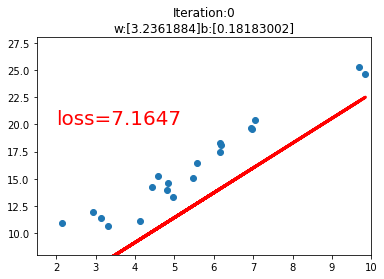

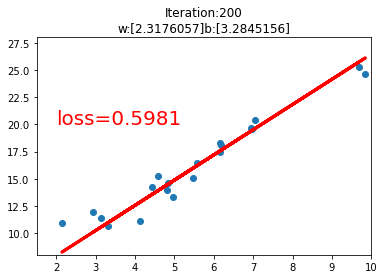

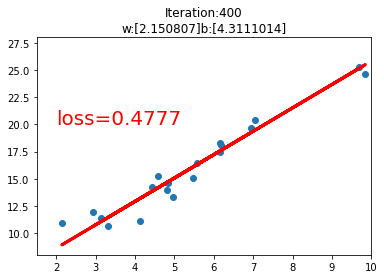

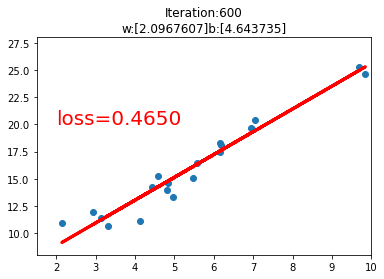

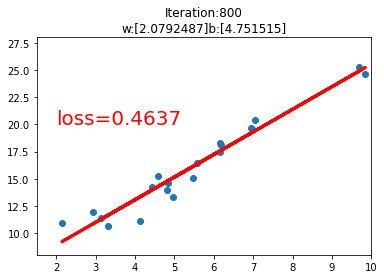

In [12]:
import torch
import matplotlib.pyplot as plt
torch.manual_seed(10)

lr = 0.05

x = torch.rand(20, 1) * 10
y = 2*x + (5 + torch.randn(20, 1))
print('x:{}'.format(x.data))
print('y:{}'.format(y.data))

w = torch.randn((1), requires_grad=True)
b = torch.zeros((1), requires_grad=True)

for iteration in range(1000):
    wx = torch.mul(w, x)
    y_pred = torch.add(wx, b)

    loss = (0.5*(y - y_pred)**2).mean()

    loss.backward()

    b.data.sub_(lr*b.grad)
    w.data.sub_(lr*w.grad)

    w.grad.zero_()
    b.grad.zero_()

    if iteration % 200 == 0:
        plt.scatter(x.data, y.data)
        plt.plot(x.data.numpy(), y_pred.data.numpy(), 'r-', lw=3)
        plt.text(2, 20, 'loss=%.4f' % loss.data.numpy(), fontdict={'size':20, 'color':'red'})
        plt.xlim(1.5, 10)
        plt.ylim(8, 28)
        plt.title('Iteration:{}\nw:{}b:{}'.format(iteration, w.data.numpy(), b.data.numpy()))
        plt.pause(0.5)

        if loss.data < 0.1:
            break
